## Library

In [156]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=9b448f10469e55aa738e65bae82b808e3f062e5868e0ad632a7f6645d58df993
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [157]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import joblib
import numpy as np
from pyswarm import pso

# Persiapan Data

In [62]:
df = pd.read_excel('spk_mhs_data_fix.xlsx')
df

,NPM,Nama Mahasiswa,Algoritma,Statistika,Nilai Project,Motivasi,Kedisiplinan Akademik,Keaktifan
0,65122002,Muhammad Fadil,A,B,88,3,87.25,65.100791
1,65122003,Ayuni Aulia Prihatini,A,B,91,2,86.50,62.286218
2,65122004,Nasywa Aura Permata Hati,A,B,90,1,87.25,64.682685
3,65122005,Helena Octaviana,A,B,89,2,87.50,93.909625
4,65122007,Muhammad Rafli Argoebi,B,C,75,2,76.75,10.567156
...,...,...,...,...,...,...,...,...
206,65122234,Fathur Rizki Ramadhan,D,E,76,2,43.75,37.818150
207,65122235,Farghan Sidratul Biantara,A,C,81,5,70.50,55.042680
208,65122236,Dzaky Muhammad,C,E,60,2,65.25,92.540133
209,65122240,Bambang Sugiharto,B,A,82,1,95.50,14.254750


In [65]:
def convert_grade_to_numeric(grade):
    grade_mapping = {
        'A': 90,
        'B': 80,
        'C': 70,
        'D': 60,
        'E': 50,
        'F': 40
    }
    return grade_mapping.get(grade, 0)

In [66]:
df['Algoritma_Numeric'] = df['Algoritma'].apply(convert_grade_to_numeric)
df['Statistika_Numeric'] = df['Statistika'].apply(convert_grade_to_numeric)

In [70]:
df[['Algoritma', 'Statistika', 'Algoritma_Numeric', 'Statistika_Numeric']].head()

,Algoritma,Statistika,Algoritma_Numeric,Statistika_Numeric
0,A,B,90,80
1,A,B,90,80
2,A,B,90,80
3,A,B,90,80
4,B,C,80,70


In [71]:
def determine_peminatan(row):
    if row['Algoritma_Numeric'] > row['Statistika_Numeric']:
        return 'Kodingan'
    elif row['Statistika_Numeric'] > row['Algoritma_Numeric']:
        return 'Data'
    elif row['Algoritma_Numeric'] <= 80 and row['Statistika_Numeric'] <= 80 and row['Nilai Project'] < 80:
        return 'Tidak Diketahui'
    else:
        return 'Tidak Diketahui'

df['Peminatan'] = df.apply(determine_peminatan, axis=1)

In [72]:
df

,NPM,Nama Mahasiswa,Algoritma,Statistika,Nilai Project,Motivasi,Kedisiplinan Akademik,Keaktifan,Algoritma_Numeric,Statistika_Numeric,Peminatan
0,65122002,Muhammad Fadil,A,B,88,3,87.25,65.100791,90,80,Kodingan
1,65122003,Ayuni Aulia Prihatini,A,B,91,2,86.50,62.286218,90,80,Kodingan
2,65122004,Nasywa Aura Permata Hati,A,B,90,1,87.25,64.682685,90,80,Kodingan
3,65122005,Helena Octaviana,A,B,89,2,87.50,93.909625,90,80,Kodingan
4,65122007,Muhammad Rafli Argoebi,B,C,75,2,76.75,10.567156,80,70,Kodingan
...,...,...,...,...,...,...,...,...,...,...,...
206,65122234,Fathur Rizki Ramadhan,D,E,76,2,43.75,37.818150,60,50,Kodingan
207,65122235,Farghan Sidratul Biantara,A,C,81,5,70.50,55.042680,90,70,Kodingan
208,65122236,Dzaky Muhammad,C,E,60,2,65.25,92.540133,70,50,Kodingan
209,65122240,Bambang Sugiharto,B,A,82,1,95.50,14.254750,80,90,Data


In [73]:
df.to_csv('spk_mhs_data_csv.csv', index=False)

# Klastering Data Mahasiswa

## Pilih fitur

In [91]:
features = ['Algoritma_Numeric', 'Statistika_Numeric', 'Nilai Project', 'Kedisiplinan Akademik', 'Keaktifan']
X = df[features]

X.head()

,Algoritma_Numeric,Statistika_Numeric,Nilai Project,Kedisiplinan Akademik,Keaktifan
0,90,80,88,87.25,65.100791
1,90,80,91,86.50,62.286218
2,90,80,90,87.25,64.682685
3,90,80,89,87.50,93.909625
4,80,70,75,76.75,10.567156


## Normalisasi Data

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X_scaled[:5]

array([[ 1.07862643,  0.04895528,  0.83148402,  0.26119506,  0.41432122],
       [ 1.07862643,  0.04895528,  1.05854588,  0.21911757,  0.31933826],
       [ 1.07862643,  0.04895528,  0.9828586 ,  0.26119506,  0.40021147],
       [ 1.07862643,  0.04895528,  0.90717131,  0.27522088,  1.38652852],
       [-0.0650428 , -0.74562654, -0.15245069, -0.32788975, -1.42601701]])

## Menentukan Jumlah Kluster (Elbow Method)

In [94]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

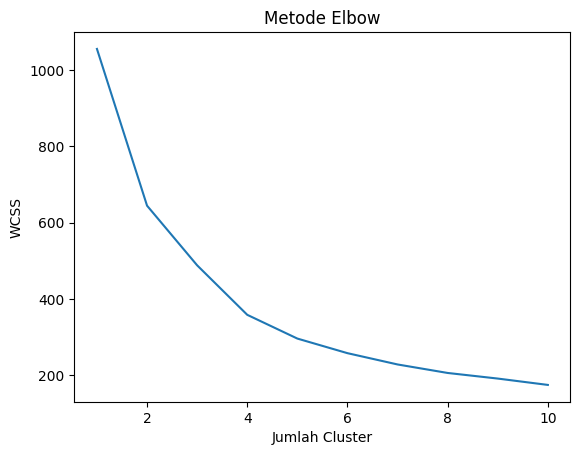

In [95]:
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

## Kmeans Klustering

In [96]:
optimal_clusters = 4

In [97]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

In [98]:
df['Cluster'] = y_kmeans

In [99]:
df

,NPM,Nama Mahasiswa,Algoritma,Statistika,Nilai Project,Motivasi,Kedisiplinan Akademik,Keaktifan,Algoritma_Numeric,Statistika_Numeric,Peminatan,Cluster
0,65122002,Muhammad Fadil,A,B,88,3,87.25,65.100791,90,80,Kodingan,3
1,65122003,Ayuni Aulia Prihatini,A,B,91,2,86.50,62.286218,90,80,Kodingan,3
2,65122004,Nasywa Aura Permata Hati,A,B,90,1,87.25,64.682685,90,80,Kodingan,3
3,65122005,Helena Octaviana,A,B,89,2,87.50,93.909625,90,80,Kodingan,3
4,65122007,Muhammad Rafli Argoebi,B,C,75,2,76.75,10.567156,80,70,Kodingan,1
...,...,...,...,...,...,...,...,...,...,...,...,...
206,65122234,Fathur Rizki Ramadhan,D,E,76,2,43.75,37.818150,60,50,Kodingan,0
207,65122235,Farghan Sidratul Biantara,A,C,81,5,70.50,55.042680,90,70,Kodingan,3
208,65122236,Dzaky Muhammad,C,E,60,2,65.25,92.540133,70,50,Kodingan,0
209,65122240,Bambang Sugiharto,B,A,82,1,95.50,14.254750,80,90,Data,1


## Coba Visualisasi

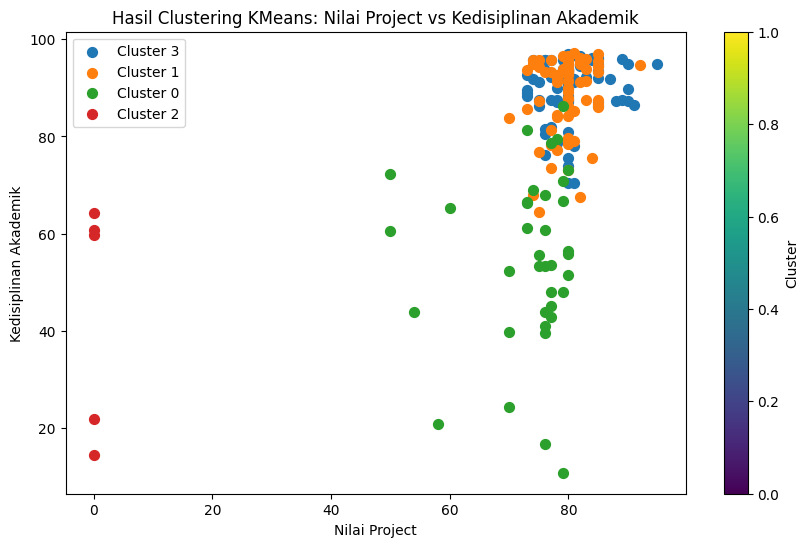

In [121]:
cmap = plt.get_cmap('tab10')

unique_clusters = df['Cluster'].unique()
colors = [cmap(i) for i in range(len(unique_clusters))]

plt.figure(figsize=(10, 6))
for cluster, color in zip(unique_clusters, colors):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Nilai Project'], subset['Kedisiplinan Akademik'],
                c=[color], label=f'Cluster {cluster}', s=50)

plt.xlabel('Nilai Project')
plt.ylabel('Kedisiplinan Akademik')
plt.title('Hasil Clustering KMeans: Nilai Project vs Kedisiplinan Akademik')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


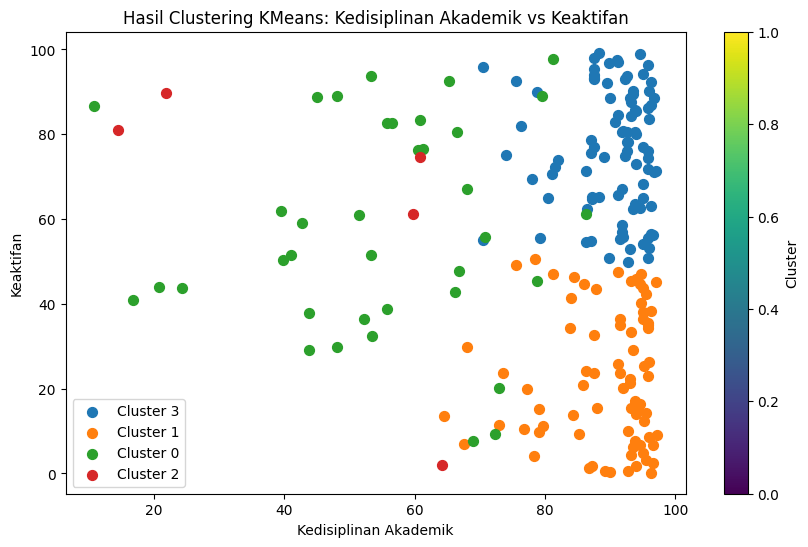

In [122]:
plt.figure(figsize=(10, 6))
for cluster, color in zip(unique_clusters, colors):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Kedisiplinan Akademik'], subset['Keaktifan'],
                c=[color], label=f'Cluster {cluster}', s=50)

plt.xlabel('Kedisiplinan Akademik')
plt.ylabel('Keaktifan')
plt.title('Hasil Clustering KMeans: Kedisiplinan Akademik vs Keaktifan')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

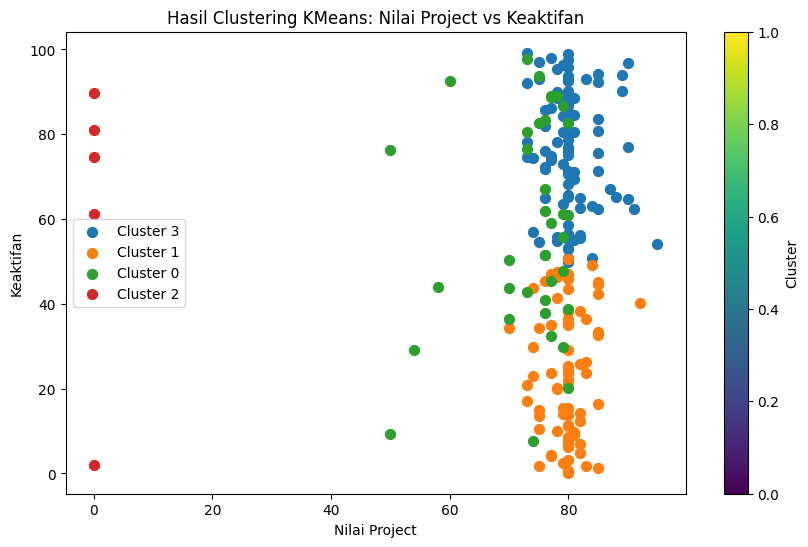

In [123]:
plt.figure(figsize=(10, 6))
for cluster, color in zip(unique_clusters, colors):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Nilai Project'], subset['Keaktifan'],
                c=[color], label=f'Cluster {cluster}', s=50)

plt.xlabel('Nilai Project')
plt.ylabel('Keaktifan')
plt.title('Hasil Clustering KMeans: Nilai Project vs Keaktifan')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

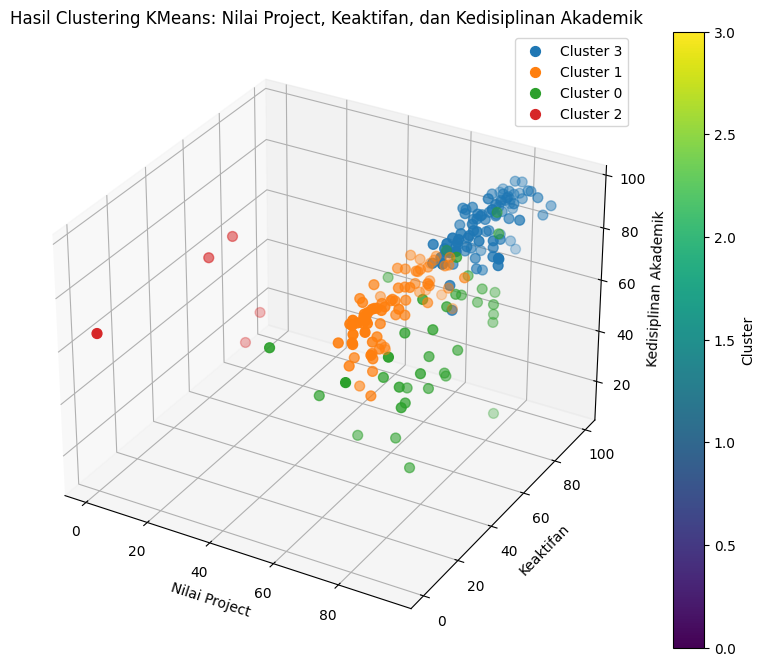

In [124]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster, color in zip(unique_clusters, colors):
    subset = df[df['Cluster'] == cluster]
    ax.scatter(subset['Nilai Project'], subset['Keaktifan'], subset['Kedisiplinan Akademik'],
               c=[color], label=f'Cluster {cluster}', s=50)

ax.set_xlabel('Nilai Project')
ax.set_ylabel('Keaktifan')
ax.set_zlabel('Kedisiplinan Akademik')
ax.set_title('Hasil Clustering KMeans: Nilai Project, Keaktifan, dan Kedisiplinan Akademik')

ax.legend()

plt.colorbar(sc, ax=ax, label='Cluster')

plt.show()

# Labeling Data

In [125]:
cluster_labels = {
    3: 'Potensi Tinggi',
    1: 'Potensi Sedang',
    0: 'Potensi Rendah',
    2: 'Tidak ada potensi'
}

df['Label Cluster'] = df['Cluster'].map(cluster_labels)

In [126]:
df

,NPM,Nama Mahasiswa,Algoritma,Statistika,Nilai Project,Motivasi,Kedisiplinan Akademik,Keaktifan,Algoritma_Numeric,Statistika_Numeric,Peminatan,Cluster,Label Cluster
0,65122002,Muhammad Fadil,A,B,88,3,87.25,65.100791,90,80,Kodingan,3,Potensi Tinggi
1,65122003,Ayuni Aulia Prihatini,A,B,91,2,86.50,62.286218,90,80,Kodingan,3,Potensi Tinggi
2,65122004,Nasywa Aura Permata Hati,A,B,90,1,87.25,64.682685,90,80,Kodingan,3,Potensi Tinggi
3,65122005,Helena Octaviana,A,B,89,2,87.50,93.909625,90,80,Kodingan,3,Potensi Tinggi
4,65122007,Muhammad Rafli Argoebi,B,C,75,2,76.75,10.567156,80,70,Kodingan,1,Potensi Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,65122234,Fathur Rizki Ramadhan,D,E,76,2,43.75,37.818150,60,50,Kodingan,0,Potensi Rendah
207,65122235,Farghan Sidratul Biantara,A,C,81,5,70.50,55.042680,90,70,Kodingan,3,Potensi Tinggi
208,65122236,Dzaky Muhammad,C,E,60,2,65.25,92.540133,70,50,Kodingan,0,Potensi Rendah
209,65122240,Bambang Sugiharto,B,A,82,1,95.50,14.254750,80,90,Data,1,Potensi Sedang


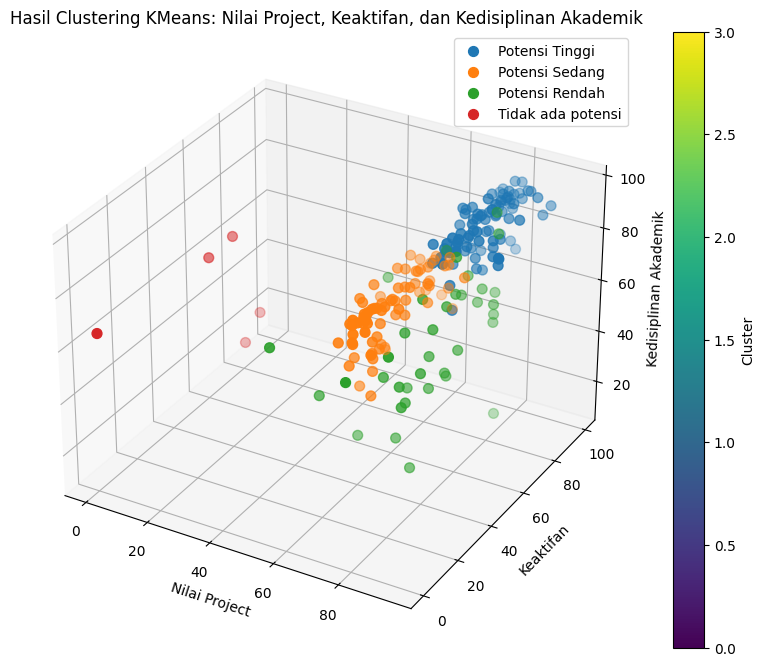

In [128]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster, color in zip(unique_clusters, colors):
    subset = df[df['Cluster'] == cluster]
    ax.scatter(subset['Nilai Project'], subset['Keaktifan'], subset['Kedisiplinan Akademik'],
               c=[color], label=cluster_labels[cluster], s=50)

ax.set_xlabel('Nilai Project')
ax.set_ylabel('Keaktifan')
ax.set_zlabel('Kedisiplinan Akademik')
ax.set_title('Hasil Clustering KMeans: Nilai Project, Keaktifan, dan Kedisiplinan Akademik')

ax.legend()
plt.colorbar(sc, ax=ax, label='Cluster')

plt.show()

In [129]:
df.to_csv('spk_klustering_result', index=False)
df

,NPM,Nama Mahasiswa,Algoritma,Statistika,Nilai Project,Motivasi,Kedisiplinan Akademik,Keaktifan,Algoritma_Numeric,Statistika_Numeric,Peminatan,Cluster,Label Cluster
0,65122002,Muhammad Fadil,A,B,88,3,87.25,65.100791,90,80,Kodingan,3,Potensi Tinggi
1,65122003,Ayuni Aulia Prihatini,A,B,91,2,86.50,62.286218,90,80,Kodingan,3,Potensi Tinggi
2,65122004,Nasywa Aura Permata Hati,A,B,90,1,87.25,64.682685,90,80,Kodingan,3,Potensi Tinggi
3,65122005,Helena Octaviana,A,B,89,2,87.50,93.909625,90,80,Kodingan,3,Potensi Tinggi
4,65122007,Muhammad Rafli Argoebi,B,C,75,2,76.75,10.567156,80,70,Kodingan,1,Potensi Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,65122234,Fathur Rizki Ramadhan,D,E,76,2,43.75,37.818150,60,50,Kodingan,0,Potensi Rendah
207,65122235,Farghan Sidratul Biantara,A,C,81,5,70.50,55.042680,90,70,Kodingan,3,Potensi Tinggi
208,65122236,Dzaky Muhammad,C,E,60,2,65.25,92.540133,70,50,Kodingan,0,Potensi Rendah
209,65122240,Bambang Sugiharto,B,A,82,1,95.50,14.254750,80,90,Data,1,Potensi Sedang


# Simpan Model Clustering nya

In [134]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [137]:
kmeans_loaded = joblib.load('kmeans_model.pkl')

In [139]:
predictions = kmeans_loaded.predict(X_scaled)
predictions

array([3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3,
       1, 3, 3, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 3, 3, 3, 3, 0, 3, 1, 0, 1,
       2, 0, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 1, 0, 1, 0, 1, 1, 3, 1, 0, 1,
       0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 0, 0, 3, 3, 3, 3, 3, 0, 1, 3, 3,
       0, 3, 0, 1, 3, 3, 3, 1, 1, 0, 3, 3, 1, 3, 3, 0, 1, 3, 0, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 3, 0, 3, 1, 0, 0, 1, 0, 0, 3, 1, 0, 0, 3, 3, 3,
       3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 0, 1, 1,
       1, 3, 0, 1, 3, 3, 2, 1, 1, 1, 3, 0, 1, 2, 3, 3, 1, 3, 3, 0, 3, 0,
       0, 1, 3, 1, 0, 1, 3, 0, 0, 3, 0, 1, 2], dtype=int32)

# Penentuan Bobot (PSO)

## Kriteria dan Sub-kriteria

Daftar Kriteria
1. Interview:
  - Pemecahan Masalah (benefit)
  - Komunikasi (benefit)
  - Gestur (benefit)
  - Kepemimpinan (benefit)
  - Pengetahuan (benefit)
  - Durasi Wawancara (cost) - Menilai efisiensi waktu yang digunakan selama wawancara

2. Substance Test:
  - Keterampilan Analitis (benefit)
  - Pemahaman Konsep (benefit)
  - Ketepatan (benefit)
  - Waktu Penyelesaian Soal (cost) - Menilai seberapa cepat kandidat dapat menyelesaikan soal

3. Micro Teaching:
  - Penyampaian Materi (benefit)
  - Interaksi dengan Peserta (benefit)
  - Pengelolaan Waktu (benefit)
  - Persiapan (benefit)
  - Durasi Pengajaran (cost) - Menilai efisiensi waktu yang digunakan selama pengajaran

4. Final Interview:
  - Komitmen Jangka Panjang (benefit)
  - Visi Pribadi (benefit)
  - Kematangan Emosional (cost)
  - Etika Kerja (cost)
  - Kesesuaian Budaya (benefit)
  - Keletihan Fisik (cost) - Menilai tingkat keletihan fisik yang mungkin dialami kandidat selama proses seleksi

5. Cluster:
Potensi (benefit) dengan skor: Potensi Tinggi = 3, Potensi Menengah = 2, Potensi Rendah = 1, Tidak ada Potensi = 0.

Cost : Semakin besar nilainya maka semakin tidak diharapkan.

Benefit : Semakin benasar semakin baik.

In [162]:
criteria_structure = {
    'Interview': ['Pemecahan Masalah', 'Komunikasi', 'Gestur', 'Kepemimpinan', 'Pengetahuan'],
    'Substance Test': ['Keterampilan Analitis', 'Pemahaman Konsep', 'Ketepatan', 'Waktu Penyelesaian'],
    'Micro Teaching': ['Penyampaian Materi', 'Interaksi dengan Peserta', 'Persiapan', 'Durasi Pengajaran'],
    'Final Interview': ['Komitmen Jangka Panjang', 'Visi Pribadi', 'Kematangan Emosional', 'Etika Kerja', 'Kesesuaian Budaya', 'Keletihan Fisik'],
    'Cluster': ['Cluster']
}

In [163]:
criteria_type = {
    'Pemecahan Masalah': 'benefit',
    'Komunikasi': 'benefit',
    'Gestur': 'benefit',
    'Kepemimpinan': 'benefit',
    'Pengetahuan': 'benefit',
    'Waktu Merespon': 'cost',
    'Keterampilan Analitis': 'benefit',
    'Pemahaman Konsep': 'benefit',
    'Ketepatan': 'benefit',
    'Waktu Penyelesaian': 'cost',
    'Penyampaian Materi': 'benefit',
    'Interaksi dengan Peserta': 'benefit',
    'Persiapan': 'benefit',
    'Durasi Pengajaran': 'cost',
    'Komitmen Jangka Panjang': 'benefit',
    'Visi Pribadi': 'benefit',
    'Kematangan Emosional': 'Benefit',
    'Etika Kerja': 'Benefit',
    'Kesesuaian Budaya': 'benefit',
    'Keletihan Fisik': 'cost',
    'Cluster': 'benefit'
}

## Membaca data sebelumnya

In [177]:
historical_data = pd.read_excel('data_history_bobot.xlsx')
historical_data

,NPM,Nama Mahasiswa,Pemecahan Masalah,Komunikasi,Gestur,Kepemimpinan,Pengetahuan,Waktu Merespon,Keterampilan Analitis,Pemahaman Konsep,...,Interaksi dengan Peserta,Persiapan,Durasi Pengajaran,Komitmen Jangka Panjang,Visi Pribadi,Kematangan Emosional,Etika Kerja,Kesuaian Budaya,Keletihan Fisik,Cluster
0,65121018,Ajiz Abdul Majid,9.0,10.0,10.0,9.0,9.0,1.0,9.0,10.0,...,10.0,10.0,2,8.0,9.5,8.0,8.5,10.0,1,3
1,65121024,Amanda Putri Pramira Azzahra,9.0,8.5,8.0,9.0,9.0,1.0,9.0,8.5,...,8.0,8.5,2,9.0,9.0,8.0,9.0,9.0,3,3
2,65121025,Ridho Gusti Mardotilah,8.5,8.5,8.5,9.0,9.0,2.0,8.5,9.0,...,8.5,9.0,2,9.0,8.5,8.0,8.0,9.0,3,3
3,65121064,Resi Alindiana,8.0,8.0,8.0,8.0,8.5,4.0,9.0,8.5,...,8.0,8.5,2,9.0,8.5,9.0,9.0,8.5,2,3
4,65121081,Fania Hafidtha,8.5,9.0,8.0,8.5,8.5,3.0,8.5,9.0,...,9.0,8.5,2,9.0,8.5,9.0,9.0,9.0,4,3
5,65121100,Muhamad Bayu Fadayan,8.0,8.0,8.0,8.0,9.0,2.5,9.0,9.0,...,8.5,9.0,2,8.0,8.5,9.0,8.5,8.5,1,3
6,65121131,Fakhriza Shidhqi Wafiq Fauzi,10.0,10.0,9.0,10.0,10.0,1.0,10.0,10.0,...,10.0,10.0,1,10.0,9.0,9.0,10.0,10.0,1,3
7,65121154,Moch. Fahdin,9.5,9.0,9.0,9.5,10.0,2.0,9.0,10.0,...,9.0,9.0,1,8.5,8.5,9.0,9.0,9.0,2,3
8,65120160,Natasya Aprilyanti Putri,8.0,8.5,8.0,8.0,8.5,3.0,9.0,8.5,...,8.0,8.0,3,8.5,8.5,8.0,9.0,8.5,3,2
9,65120132,Zakiyah Humaira,9.0,8.5,9.0,8.5,9.0,2.0,9.0,9.0,...,9.0,8.0,3,9.0,9.0,8.5,9.0,9.0,3,2


In [183]:
# Definisikan struktur kriteria dan jenis kriteria
criteria_structure = {
    'Interview': ['Pemecahan Masalah', 'Komunikasi', 'Gestur', 'Kepemimpinan', 'Pengetahuan'],
    'Substance Test': ['Keterampilan Analitis', 'Pemahaman Konsep', 'Ketepatan', 'Waktu Penyelesaian'],
    'Micro Teaching': ['Penyampaian Materi', 'Interaksi dengan Peserta', 'Persiapan', 'Durasi Pengajaran'],
    'Final Interview': ['Komitmen Jangka Panjang', 'Visi Pribadi', 'Kematangan Emosional', 'Etika Kerja', 'Kesesuaian Budaya', 'Keletihan Fisik'],
    'Cluster': ['Cluster']
}

In [184]:
for criterion, sub_criteria in criteria_structure.items():
    for sub_criterion in sub_criteria:
        if sub_criterion not in historical_data.columns:
            print(f"Kolom {sub_criterion} tidak ada dalam dataframe")

## Fungsi Tujuan

In [185]:
def objective_function(weights):
    # Normalisasi bobot sehingga jumlahnya sama dengan 1
    normalized_weights = weights / np.sum(weights)

    # Inisialisasi skor total
    total_scores = np.zeros(len(historical_data))

    # Hitung skor total untuk setiap kandidat berdasarkan kriteria dan sub kriteria
    idx = 0
    for criterion, sub_criteria in criteria_structure.items():
        sub_weights = normalized_weights[idx:idx+len(sub_criteria)]
        sub_weights /= np.sum(sub_weights)  # Normalisasi bobot sub kriteria
        idx += len(sub_criteria)

        sub_scores = historical_data[sub_criteria].values
        for i, sub_criterion in enumerate(sub_criteria):
            if criteria_type[sub_criterion] == 'benefit':
                total_scores += sub_scores[:, i] * sub_weights[i]
            else:  # cost
                total_scores -= sub_scores[:, i] * sub_weights[i]

    # Ambil kolom hasil keputusan (target)
    target = historical_data['Hasil'].values  # 1 untuk diterima, 0 untuk ditolak

    # Hitung kesalahan prediksi
    error = np.mean((total_scores - target) ** 2)

    # Tujuan utama adalah untuk memaksimalkan bobot pada kriteria yang penting
    important_weights = normalized_weights[:5]  # Contoh: bobot pada kriteria pertama dianggap penting
    importance_factor = np.sum(important_weights)

    # Kombinasikan kesalahan prediksi dan faktor penting
    combined_objective = error - importance_factor

    return combined_objective

## Implementasi PSO

In [186]:
num_sub_criteria = sum(len(sub_criteria) for sub_criteria in criteria_structure.items())

# Batas atas dan bawah untuk bobot (0 sampai 1)
lb = [0] * num_sub_riteria
ub = [1] * num_sub_riteria

# Menjalankan PSO untuk menemukan bobot optimal
optimal_weights, optimal_error = pso(objective_function, lb, ub, swarmsize=100, maxiter=200)

# Normalisasi bobot optimal sehingga jumlahnya sama dengan 1
optimal_weights = optimal_weights / np.sum(optimal_weights)

print(f"Bobot Optimal: {optimal_weights}")
print(f"Kesalahan Optimal: {optimal_error}")

IndexError: index 1 is out of bounds for axis 0 with size 1